                 area_name poverty_level crimes
0              Rogers Park          23.6      8
1               West Ridge          17.2      4
2                   Uptown            24      5
3           Lincoln Square          10.9      2
4             North Center           7.5      4
5                Lake View          11.4      9
6             Lincoln Park          12.3      9
7          Near North Side          12.9     26
8              Edison Park           3.3      0
9             Norwood Park           5.4      1
10          Jefferson Park           8.6      4
11             Forest Glen           7.5      2
12              North Park          13.2      1
13             Albany Park          19.2      4
14            Portage Park          11.6     10
15             Irving Park          13.1      1
16                 Dunning          10.6      5
17              Montclaire          15.3      1
18          Belmont Cragin          18.7      4
19                 Hermosa          20.5

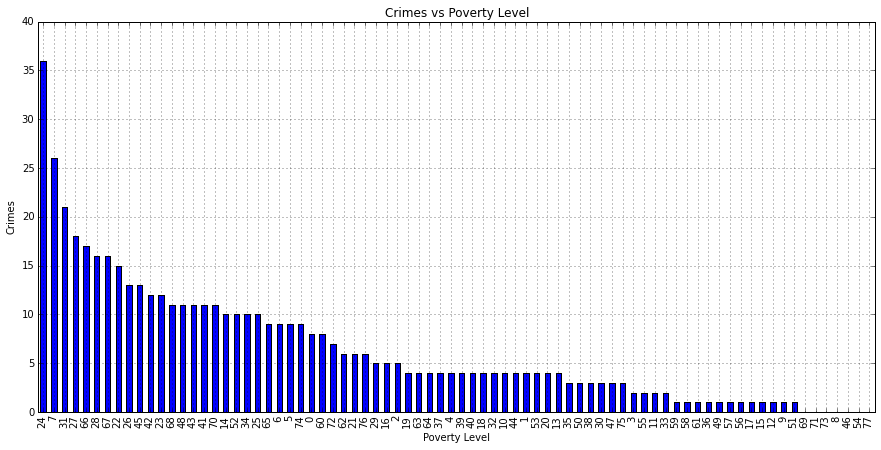

In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


columns = ['area_name','poverty_level','crimes']
index = np.arange(80) # array of numbers for the number of samples
df = pd.DataFrame(columns=columns, index = index)
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""
counter = 0
with open("socioeconomic_chicago.rdf") as f:
    
    for line in f:
        s = df.xs(counter)
        if "<ds:community_area_name>" in line:
            areaName = find_between( line, "<ds:community_area_name>", "</ds:community_area_name>" )
            areaName = areaName.rstrip()
            s.area_name = areaName
            #print areaName
        if "<ds:percent_households_below_poverty>" in line:
            povertyLevel = find_between( line, "<ds:percent_households_below_poverty>","</ds:percent_households_below_poverty>")
            s.poverty_level = povertyLevel
            s.crimes=0
            df.append(s)
            counter += 1
            #print povertyLevel

with open("crimes_chicago.rdf") as f:
    
    for line in f:
        if "<ds:community_area>" in line:
            areaNumber = find_between( line, "<ds:community_area>", "</ds:community_area>" )
            areaNumber = int(areaNumber)
            #print df['crimes'][areaNumber-1]
            df['crimes'][areaNumber-1]=df['crimes'][areaNumber-1]+1


df2 = df.ix[:77]            
#print df2
my_plot = df2.sort(columns='crimes',ascending=False).plot(kind='bar',legend=None,title="Crimes vs Poverty Level",figsize=(15, 7))

my_plot.set_xlabel("Poverty Level")
my_plot.set_ylabel("Crimes")     
            
            